## Logistic Regression

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import collections
from scipy import stats
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from math import sqrt
from datetime import datetime, timedelta
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
from collections import Counter


from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_score, cross_validate

In [4]:
dsdata = pd.read_csv('new_ds_salaries.csv')
ds_new = dsdata.copy()

# Exploring the numeric data in hr_data
ds_num = ds_new.select_dtypes(['int64', 'float64']).copy()
ds_num.head()


,work_year,salary,salary_in_usd,remote_ratio,experience_levelN,company_sizeN,employment_typeN,employee_continentN,company_continentN
0,2020,70000,79833,0,1,2,1,0,0
1,2020,260000,260000,0,2,0,1,1,1
2,2020,85000,109024,1,2,1,1,0,0
3,2020,20000,20000,0,1,0,1,2,2
4,2020,150000,150000,1,2,2,1,2,2


In [8]:
from sklearn.linear_model import LogisticRegression

X = ds_num.drop(["work_year", "salary", "salary_in_usd"], axis = 1)
Y = dsdata["salary_group"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=48)
logreg =  LogisticRegression(solver='liblinear') 
logreg.fit(X_train,Y_train) 

Y_pred=logreg.predict(X_test) 

Y_pred 

array(['low', 'low-mid', 'low-mid', 'low', 'low', 'low', 'low-mid',
       'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low', 'low', 'low',
       'low', 'low-mid', 'low-mid', 'low-mid', 'low', 'low', 'low-mid',
       'low-mid', 'low', 'low-mid', 'low', 'low-mid', 'low-mid',
       'low-mid', 'low-mid', 'low-mid', 'mid', 'low-mid', 'low',
       'low-mid', 'mid', 'low-mid', 'low', 'low', 'low', 'low-mid', 'low',
       'low-mid', 'low-mid', 'mid', 'low', 'low-mid', 'low-mid',
       'low-mid', 'low', 'low-mid', 'low-mid', 'mid', 'low-mid', 'low',
       'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low-mid',
       'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low',
       'mid-high', 'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low',
       'low-mid', 'low-mid', 'low-mid', 'low', 'mid', 'low-mid',
       'low-mid', 'low-mid', 'low', 'low-mid', 'low-mid', 'low-mid',
       'low-mid', 'low-mid', 'low-mid', 'low-mid', 'low', 'low',
       'low-mid', 'low-mid', 'low-m

In [9]:
print("Accuracy:",accuracy_score(Y_test, Y_pred)) 

Accuracy: 0.47540983606557374


In [11]:
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

cnf_matrix 

array([[ 0,  0,  2,  0,  0,  0],
       [ 0, 23, 17,  0,  0,  0],
       [ 0, 10, 29,  2,  0,  0],
       [ 0,  0, 22,  6,  1,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

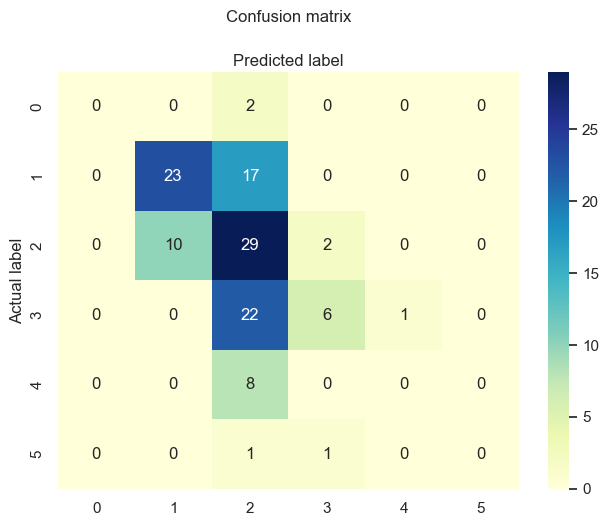

In [12]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')